In [17]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import math

In [52]:
#load data
def load_all_conditions():
    allConds = []
    condNames = []
    min_sizes = []
    condition_paths = Path(".").glob("C*/")
    for condition in condition_paths:
        print(condition)
        replicate_paths = condition.glob("*")
        allDFs = []
        sizes = []
        for replicate in sorted(replicate_paths):
            if not (replicate / 'pop.csv').exists():
                print(replicate, " is missing pop Data!")
            else:
                # print("Loading replicate {}...".format(replicate))
                df = pd.read_csv(replicate / 'pop.csv')
                #select which data fields to keep (optional step, comment out and use df instead for all columns)
                df_redux = df[["update","Change_Color_AVE","Computation_rounds_AVE","Read_msg_AVE","Send_msg_AVE","graphScore_AVE","optimizeValue_AVE"]]
                #df_redux = df[["update","Change_Color_AVE","Computation_rounds_AVE","Read_msg_AVE","Send_msg_AVE","graphScore_AVE","optimizeValue"]]
                #if (df_redux["Computation_rounds_AVE"].tail(20).iloc[0] < 1000):
                #print(df_redux["graphScore_AVE"].tail(20))
                sizes.append(len(df_redux))
                allDFs.append(df_redux)
            #break
        print("Loaded {} replicates.".format(len(allDFs)))
        df_concat = pd.concat([df for df in allDFs])
        df_byUpdate = df_concat.groupby('update')
        df_means = df_byUpdate.mean()
        df_sems = df_byUpdate.sem()
        allConds.append([df_means,df_sems])
        condNames.append(str(condition))
        ms = min(sizes)
        min_sizes.append(ms)
        print("Minimum Generations: {}\n".format(ms))
    
    return zip(*sorted(zip(allConds, condNames), key=lambda x: x[1])), min_sizes
    # return allConds, condNames


(data, names), min_sizes = load_all_conditions()
print("DONE")

C0__brain_ANN
Loaded 330 replicates.
Minimum Generations: 135

C1__brain_BiLog
Loaded 327 replicates.
Minimum Generations: 1162

C2__brain_Markov
Loaded 331 replicates.
Minimum Generations: 776

DONE


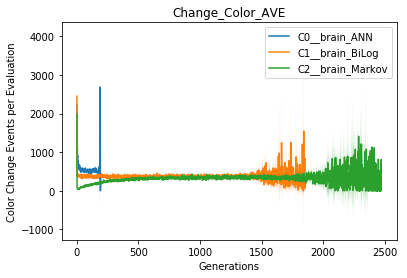

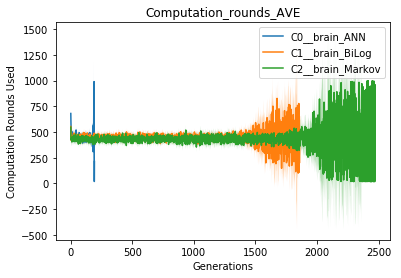

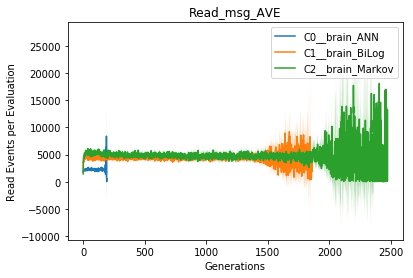

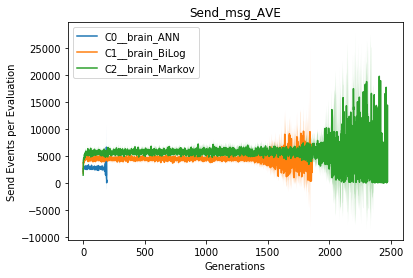

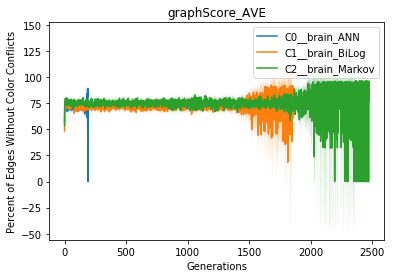

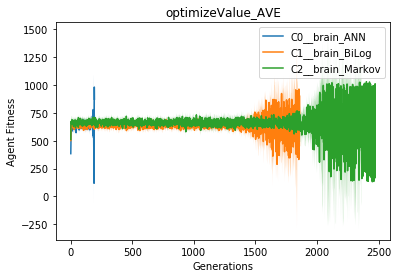

In [53]:
reps = 333 #for naming saved images, does not effect code functionality
columns = range(6)
ylabels = ["Color Change Events per Evaluation",
          "Computation Rounds Used",
          "Read Events per Evaluation",
          "Send Events per Evaluation",
          "Percent of Edges Without Color Conflicts",
          "Agent Fitness"]
cut_off = min(min_sizes)
#cut_off = len(ave.iloc[:,col])

for col in columns:
    for i, condition in enumerate(data):
        ave = condition[0]
        sem = condition[1] * 1.96 # 95% conf
        
        plt.plot(range(len(ave.iloc[:,col]))[:cut_off], ave.iloc[:,col][:cut_off], label=names[i])
        plt.fill_between(range(len(ave.iloc[:,col]))[:cut_off],ave.iloc[:,col][:cut_off] + sem.iloc[:,col][:cut_off], ave.iloc[:,col][:cut_off] - sem.iloc[:,col][:cut_off], alpha=0.4)
        plt.title(ave.columns[col])
        plt.xlabel("Generations")
        plt.ylabel(ylabels[col])
        plt.legend()
        #plt.plot(range(len(ave.iloc[:,col]))[min_sizes[i]:], ave.iloc[:,col][min_sizes[i]:])
        #plt.fill_between(range(len(ave.iloc[:,col]))[min_sizes[i]:],ave.iloc[:,col][min_sizes[i]:] + sem.iloc[:,col][min_sizes[i]:], ave.iloc[:,col][min_sizes[i]:] - sem.iloc[:,col][min_sizes[i]:], alpha=0.4)
    #plt.savefig("Figures/{}_{}".format(ave.columns[col], reps))
    plt.show()